# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [3]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...

# Adverse Effects
## Proportions
Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called `two_sample_p_value`.

In [13]:
proportions = drug_safety.groupby('trx')['adverse_effects'].value_counts()
prop_stat, prop_p = proportions_ztest([proportions[('Drug', 'Yes')], proportions[('Placebo', 'Yes')]], [proportions['Drug'].sum(), proportions['Placebo'].sum()])
two_sample_p_value = prop_p

np.float64(0.9639333330262475)

## Indepedent
Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called `num_effects_p_value` containing a p-value.

In [23]:
ind_exp, ind_obs, ind_p = pingouin.chi2_independence(drug_safety, x='trx', y='num_effects')
num_effects_p_value = ind_p.set_index('test').loc['pearson', 'pval']
num_effects_p_value

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


np.float64(0.6150123339426765)

In [39]:
ind_p = stats.chi2_contingency(pd.crosstab(drug_safety['trx'], drug_safety['num_effects']))[1]
ind_p

np.float64(0.6150123339426765)

# Age Diff between Groups
Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called `age_group_effects_p_value`.

In [ ]:
drug_ages = drug_safety[drug_safety['trx'] == 'Drug']['age']
placebo_ages = drug_safety[drug_safety['trx'] == 'Placebo']['age']
t_stat, t_p = stats.ttest_ind(drug_ages, placebo_ages)
age_group_effects_p_value = t_p
age_group_effects_p_value

np.float64(0.137831157927056)

In [ ]:
mw_stat, mw_p = stats.mannwhitneyu(drug_ages, placebo_ages)
age_group_effects_p_value = mw_p
age_group_effects_p_value

<Axes: xlabel='age', ylabel='Count'>

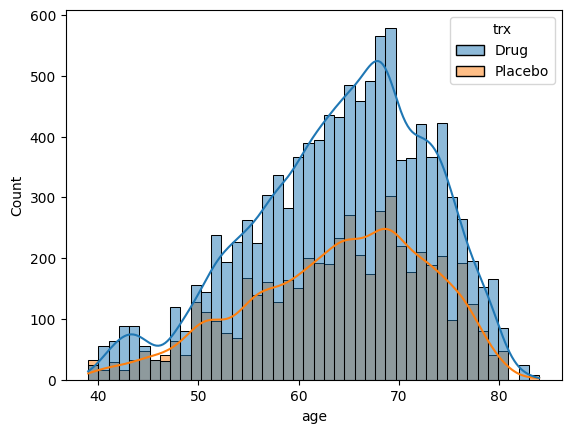

In [34]:
sns.histplot(data=drug_safety, x='age', hue='trx', kde=True)

In [38]:
mw_stat, mw_p = stats.mannwhitneyu(drug_ages, placebo_ages)
mw_p

np.float64(0.25696267004066287)